In [41]:
import ast
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
encoders_dir = "../../outputs/encoders/"
output_dir = "../.."
dataset = "timit"

In [4]:
all_scores = list((Path(encoders_dir) / dataset).glob("*/*/scores.csv"))
all_scores_keys = [
    (x.parent.name, x.parents[1].name)
    for x in all_scores
]

In [5]:
all_scores_keys

[('EC195', 'random8'),
 ('EC212', 'random8'),
 ('EC196', 'random8'),
 ('EC260', 'random8'),
 ('EC152', 'random8'),
 ('EC183', 'random8'),
 ('EC183', 'syllable'),
 ('EC152', 'syllable'),
 ('EC260', 'syllable'),
 ('EC196', 'syllable'),
 ('EC212', 'syllable'),
 ('EC195', 'syllable'),
 ('EC260', 'next_phoneme'),
 ('EC183', 'next_phoneme'),
 ('EC152', 'next_phoneme'),
 ('EC195', 'next_phoneme'),
 ('EC196', 'next_phoneme'),
 ('EC212', 'next_phoneme'),
 ('EC183', 'word_broad'),
 ('EC152', 'word_broad'),
 ('EC260', 'word_broad'),
 ('EC196', 'word_broad'),
 ('EC212', 'word_broad'),
 ('EC195', 'word_broad'),
 ('EC212', 'phoneme'),
 ('EC196', 'phoneme'),
 ('EC195', 'phoneme'),
 ('EC152', 'phoneme'),
 ('EC183', 'phoneme'),
 ('EC260', 'phoneme'),
 ('EC183', 'biphone_pred'),
 ('EC152', 'biphone_pred'),
 ('EC260', 'biphone_pred'),
 ('EC196', 'biphone_pred'),
 ('EC212', 'biphone_pred'),
 ('EC195', 'biphone_pred'),
 ('EC260', 'baseline'),
 ('EC183', 'baseline'),
 ('EC152', 'baseline'),
 ('EC195', 'base

In [55]:
all_scores_df = pd.concat([
    # whoops, output_name is a tuple -- let's read it as such
    pd.read_csv(x, converters={"output_name": ast.literal_eval}) for x in all_scores
], keys=all_scores_keys, names=["subject", "model"]).reset_index(level=2, drop=True)
all_scores_df["electrode_name"] = all_scores_df.output_name.str[1]
all_scores_df = all_scores_df.set_index("electrode_name", append=True)
all_scores_df

fold  output_dim     score  output_name
subject model         electrode_name                                         
EC195   random8       GP1                0           0 -0.002167     (0, GP1)
                      GP1                1           0 -0.000470     (0, GP1)
                      GP1                2           0 -0.000692     (0, GP1)
                      GP2                0           1 -0.000264     (1, GP2)
                      GP2                1           1 -0.001240     (1, GP2)
...                                    ...         ...       ...          ...
EC152   biphone_recon G255               1         254 -0.002378  (254, G255)
                      G255               2         254  0.001493  (254, G255)
                      G256               0         255 -0.003860  (255, G256)
                      G256               1         255 -0.003757  (255, G256)
                      G256               2         255 -0.005205  (255, G256)

[39936 rows x 4 columns]

In [56]:
all_scores_df.groupby(["subject", "model", "output_name"]).score.mean().groupby(["subject", "model"]).max().sort_values(ascending=False)

subject  model        
EC183    biphone_recon    0.351614
         word_broad       0.351603
         biphone_pred     0.351593
         syllable         0.351485
         phoneme          0.351467
         random8          0.351405
         next_phoneme     0.351384
         baseline         0.351374
EC152    biphone_pred     0.225121
         biphone_recon    0.225043
         word_broad       0.225003
         phoneme          0.224921
         syllable         0.224883
         next_phoneme     0.224870
         baseline         0.224855
         random8          0.224820
EC212    word_broad       0.211636
         biphone_pred     0.211077
         syllable         0.210861
         biphone_recon    0.210786
         phoneme          0.210590
         random8          0.210433
         next_phoneme     0.210389
         baseline         0.210337
EC260    biphone_pred     0.190789
         biphone_recon    0.190527
         syllable         0.189819
         word_broad       0.1896

<Axes: xlabel='model', ylabel='subject'>

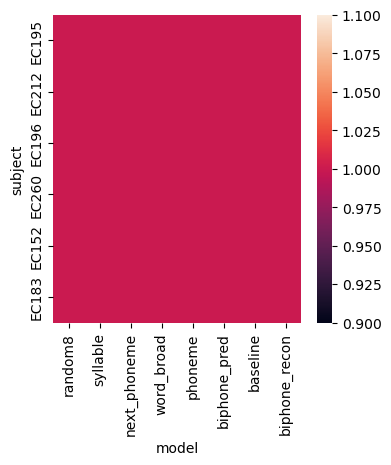

In [57]:
covered_models = list(all_scores_df.index.get_level_values("model").unique())
covered_subjects = list(all_scores_df.index.get_level_values("subject").unique())
coverage_df = pd.DataFrame(np.zeros((len(covered_subjects), len(covered_models))),
                           columns=pd.Index(covered_models, name="model"),
                            index=pd.Index(covered_subjects, name="subject"))
for subject, model in all_scores_keys:
    coverage_df.loc[subject, model] = 1
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(coverage_df)

In [58]:
all_electrodes = list((Path(encoders_dir) / dataset).glob("*/*/electrodes.csv"))
all_electrodes_df = pd.concat(
    [pd.read_csv(x) for x in all_electrodes],
    keys=[x.parent.name for x in all_electrodes],
    names=["subject"]
).set_index("electrode_name", append=True).reset_index(level=1, drop=True)
all_electrodes_df = all_electrodes_df[~all_electrodes_df.index.duplicated()]
all_electrodes_df

electrode_idx              long_name   type  \
subject electrode_name                                                
EC195   GP1                         0         PosteriorGrid1   grid   
        GP2                         1         PosteriorGrid2   grid   
        GP3                         2         PosteriorGrid3   grid   
        GP4                         3         PosteriorGrid4   grid   
        GP5                         4         PosteriorGrid5   grid   
...                               ...                    ...    ...   
EC183   STA4                      311   SubtemporalAnterior4  strip   
        STP1                      312  SubtemporalPosterior1  strip   
        STP2                      313  SubtemporalPosterior2  strip   
        STP3                      314  SubtemporalPosterior3  strip   
        STP4                      315  SubtemporalPosterior4  strip   

                                     roi  
subject electrode_name                    
EC195   GP1             inferiortemporal  
        GP2             inferiortemporal  
        GP3             inferiortemporal  
        GP4               middletemporal  
        GP5               middletemporal  
...                                  ...  
EC183   STA4            inferiortemporal  
        STP1                    fusiform  
        STP2                    fusiform  
        STP3            inferiortemporal  
        STP4            inferiortemporal  

[1979 rows x 4 columns]

In [60]:
# Merge in electrode information
all_scores_df = pd.merge(
    all_scores_df,
    all_electrodes_df.rename(columns=lambda col: f"electrode_{col}" if not col.startswith("electrode") else col),
    left_index=True, right_index=True,
    how="left", validate="many_to_one")

In [61]:
all_scores_df.to_csv(Path(output_dir) / "all_encoding_scores.csv")
all_electrodes_df.to_csv(Path(output_dir) / "all_electrodes.csv")

## Summary quantitative analysis

In [62]:
all_scores_df

fold  output_dim     score  output_name  \
subject electrode_name model                                                    
EC152   G1             random8           0           0 -0.000443      (0, G1)   
                       random8           1           0  0.000369      (0, G1)   
                       random8           2           0 -0.002065      (0, G1)   
                       syllable          0           0 -0.000475      (0, G1)   
                       syllable          1           0  0.000363      (0, G1)   
...                                    ...         ...       ...          ...   
EC260   TG99           baseline          1         226  0.008865  (226, TG99)   
                       baseline          2         226  0.014743  (226, TG99)   
                       biphone_recon     0         226  0.009509  (226, TG99)   
                       biphone_recon     1         226  0.008901  (226, TG99)   
                       biphone_recon     2         226  0.014772  (226, TG99)   

                                      electrode_idx electrode_long_name  \
subject electrode_name model                                              
EC152   G1             random8                    0     RGridElectrode1   
                       random8                    0     RGridElectrode1   
                       random8                    0     RGridElectrode1   
                       syllable                   0     RGridElectrode1   
                       syllable                   0     RGridElectrode1   
...                                             ...                 ...   
EC260   TG99           baseline                 226      TemporalGrid99   
                       baseline                 226      TemporalGrid99   
                       biphone_recon            226      TemporalGrid99   
                       biphone_recon            226      TemporalGrid99   
                       biphone_recon            226      TemporalGrid99   

                                     electrode_type     electrode_roi  
subject electrode_name model                                           
EC152   G1             random8                 grid    middletemporal  
                       random8                 grid    middletemporal  
                       random8                 grid    middletemporal  
                       syllable                grid    middletemporal  
                       syllable                grid    middletemporal  
...                                             ...               ...  
EC260   TG99           baseline                grid  superiortemporal  
                       baseline                grid  superiortemporal  
                       biphone_recon           grid  superiortemporal  
                       biphone_recon           grid  superiortemporal  
                       biphone_recon           grid  superiortemporal  

[39936 rows x 8 columns]

Text(0.5, 1.0, 'Mean baseline r^2 by subject, across all electrodes')

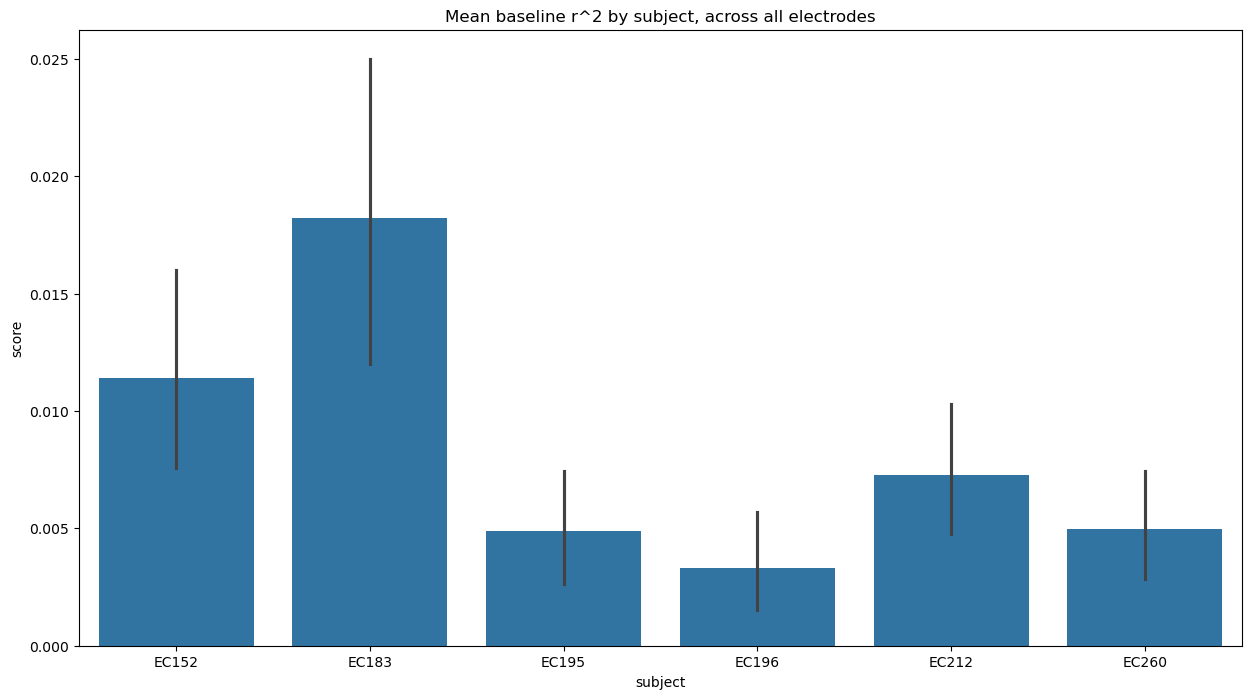

In [113]:
# plot baseline performance
baseline_scores = all_scores_df.xs("baseline", level="model")
plot_df = baseline_scores.groupby(["subject", "electrode_roi", "electrode_name"]).score.mean().reset_index()

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=plot_df, x="subject", y="score", ax=ax)
ax.set_title("Mean baseline r^2 by subject, across all electrodes")

Text(0.5, 1.0, 'Max baseline r^2 by subject, across all electrodes')

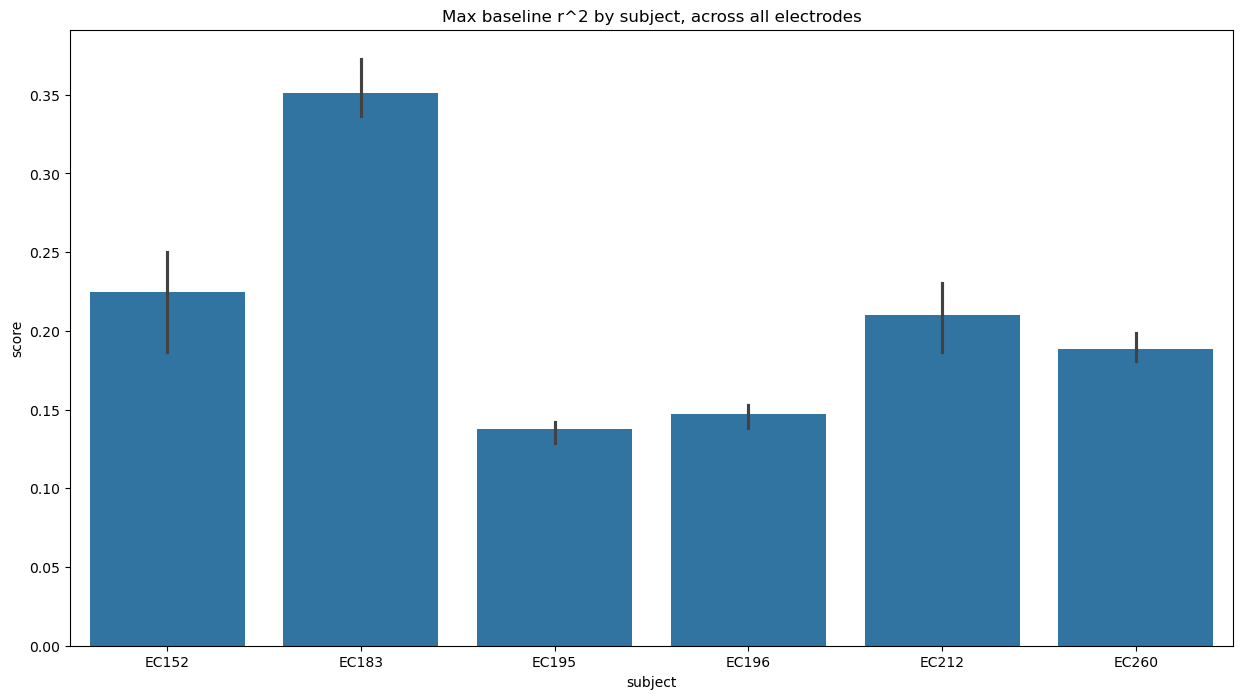

In [118]:
# plot baseline performance
baseline_scores = all_scores_df.xs("baseline", level="model")
plot_df = baseline_scores.groupby(["subject", "fold"]).score.max().reset_index()

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=plot_df, x="subject", y="score", ax=ax)
ax.set_title("Max baseline r^2 by subject, across all electrodes")

In [90]:
def compute_improvement_within_fold(fold_df):
    print(fold_df.score)
    ret = fold_df.score - fold_df.xs("baseline", level="model").score
    print(ret)
    return ret

# all_scores_df.groupby(["subject", "output_name"]).apply(compute_improvement_within_fold)
improvement_df = all_scores_df.set_index(["fold", "output_name"], append=True)
improvement_df = pd.merge(improvement_df, (improvement_df.score - improvement_df.xs("baseline", level="model").score).rename("improvement"),
                          left_index=True, right_index=True)
improvement_df = improvement_df.loc[improvement_df.index.get_level_values("model") != "baseline"]
improvement_df

output_dim     score  \
subject electrode_name model         fold output_name                         
EC152   G1             random8       0    (0, G1)               0 -0.000443   
                                     1    (0, G1)               0  0.000369   
                                     2    (0, G1)               0 -0.002065   
                       syllable      0    (0, G1)               0 -0.000475   
                                     1    (0, G1)               0  0.000363   
...                                                           ...       ...   
EC260   TG99           biphone_pred  1    (226, TG99)         226  0.008917   
                                     2    (226, TG99)         226  0.014781   
                       biphone_recon 0    (226, TG99)         226  0.009509   
                                     1    (226, TG99)         226  0.008901   
                                     2    (226, TG99)         226  0.014772   

                                                       electrode_idx  \
subject electrode_name model         fold output_name                  
EC152   G1             random8       0    (0, G1)                  0   
                                     1    (0, G1)                  0   
                                     2    (0, G1)                  0   
                       syllable      0    (0, G1)                  0   
                                     1    (0, G1)                  0   
...                                                              ...   
EC260   TG99           biphone_pred  1    (226, TG99)            226   
                                     2    (226, TG99)            226   
                       biphone_recon 0    (226, TG99)            226   
                                     1    (226, TG99)            226   
                                     2    (226, TG99)            226   

                                                      electrode_long_name  \
subject electrode_name model         fold output_name                       
EC152   G1             random8       0    (0, G1)         RGridElectrode1   
                                     1    (0, G1)         RGridElectrode1   
                                     2    (0, G1)         RGridElectrode1   
                       syllable      0    (0, G1)         RGridElectrode1   
                                     1    (0, G1)         RGridElectrode1   
...                                                                   ...   
EC260   TG99           biphone_pred  1    (226, TG99)      TemporalGrid99   
                                     2    (226, TG99)      TemporalGrid99   
                       biphone_recon 0    (226, TG99)      TemporalGrid99   
                                     1    (226, TG99)      TemporalGrid99   
                                     2    (226, TG99)      TemporalGrid99   

                                                      electrode_type  \
subject electrode_name model         fold output_name                  
EC152   G1             random8       0    (0, G1)               grid   
                                     1    (0, G1)               grid   
                                     2    (0, G1)               grid   
                       syllable      0    (0, G1)               grid   
                                     1    (0, G1)               grid   
...                                                              ...   
EC260   TG99           biphone_pred  1    (226, TG99)           grid   
                                     2    (226, TG99)           grid   
                       biphone_recon 0    (226, TG99)           grid   
                                     1    (226, TG99)           grid   
                                     2    (226, TG99)           grid   

                                                          electrode_roi  \
subject electrode_name model         fold output_name                     
E

In [142]:
improvement_df.groupby(["subject", "output_name", "model"]).improvement.mean().sort_values(ascending=False)

subject  output_name   model       
EC195    (216, GA89)   word_broad      0.003013
EC212    (201, IG74)   biphone_pred    0.002261
EC260    (206, TG79)   biphone_pred    0.002204
EC195    (216, GA89)   biphone_pred    0.002154
         (232, GA105)  biphone_pred    0.002096
                                         ...   
EC152    (164, G165)   random8        -0.000147
EC183    (15, G16)     word_broad     -0.000159
                       random8        -0.000212
EC152    (211, G212)   random8        -0.000437
         (134, G135)   random8        -0.000641
Name: improvement, Length: 11648, dtype: float64

<Axes: xlabel='model', ylabel='improvement'>

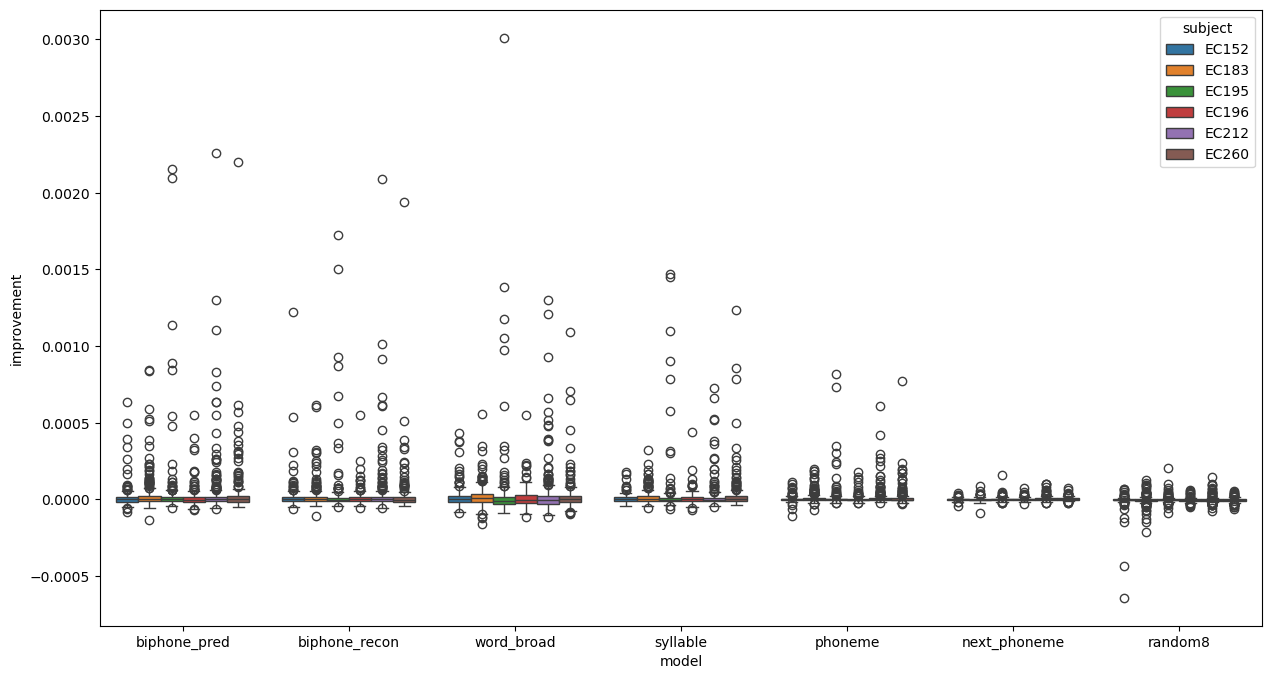

In [91]:
f, ax = plt.subplots(figsize=(15, 8))
plot_df = improvement_df.groupby(["subject", "model", "output_name"]).improvement.mean().reset_index()
sns.boxplot(data=plot_df, order=plot_df.groupby("model").improvement.mean().sort_values(ascending=False).index,
            x="model", y="improvement", hue="subject", ax=ax)

Text(0.5, 1.0, 'Mean improvement across electrodes within subject and model')

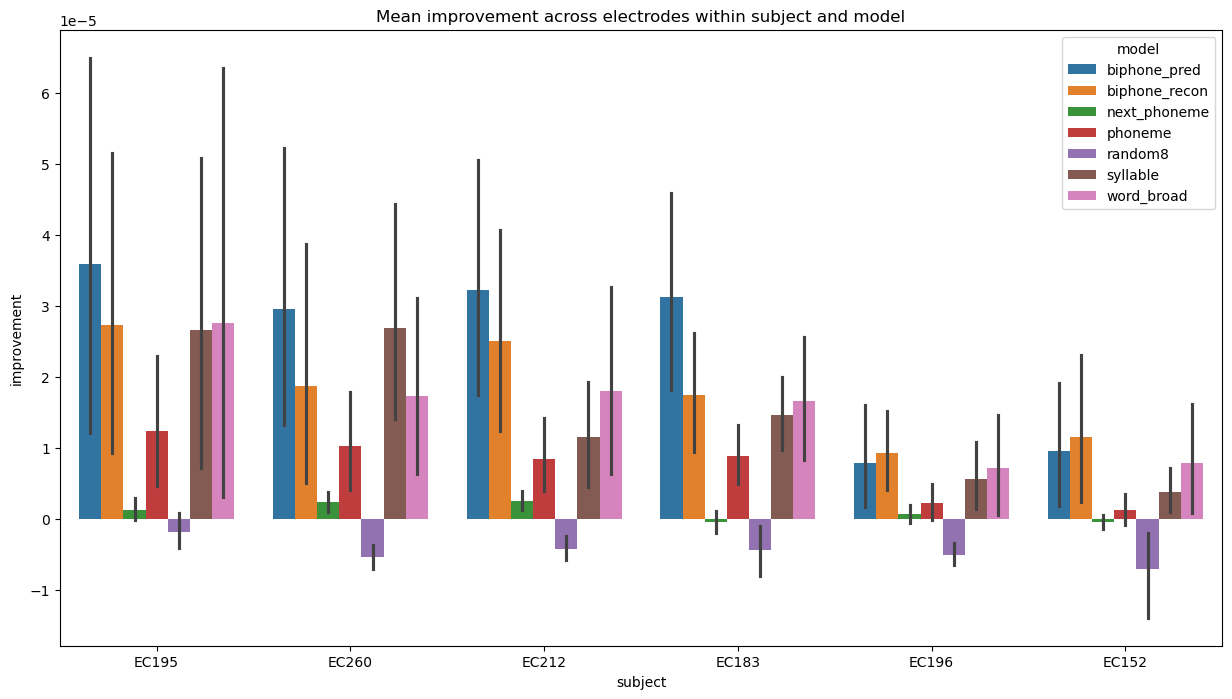

In [101]:
f, ax = plt.subplots(figsize=(15, 8))
plot_df = improvement_df.groupby(["subject", "model", "output_name"]).improvement.mean().reset_index()
sns.barplot(data=plot_df, order=plot_df.groupby("subject").improvement.mean().sort_values(ascending=False).index,
            x="subject", y="improvement", hue="model", ax=ax)
ax.set_title("Mean improvement across electrodes within subject and model")

Text(0.5, 1.0, 'Max improvement across electrodes within subject and model')

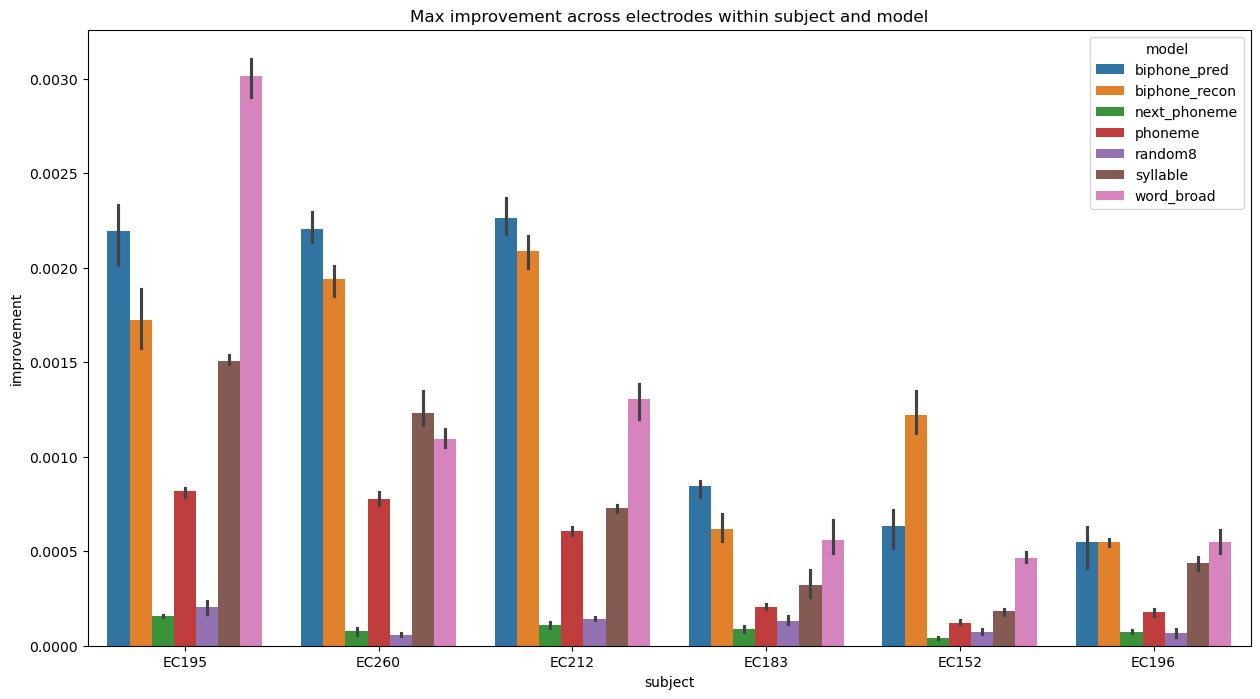

In [117]:
f, ax = plt.subplots(figsize=(15, 8))
plot_df = improvement_df.groupby(["subject", "model", "fold"]).improvement.max().reset_index()
sns.barplot(data=plot_df, order=plot_df.groupby("subject").improvement.mean().sort_values(ascending=False).index,
            x="subject", y="improvement", hue="model", ax=ax)
ax.set_title("Max improvement across electrodes within subject and model")

/tmp/ipykernel_1566324/1218305619.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


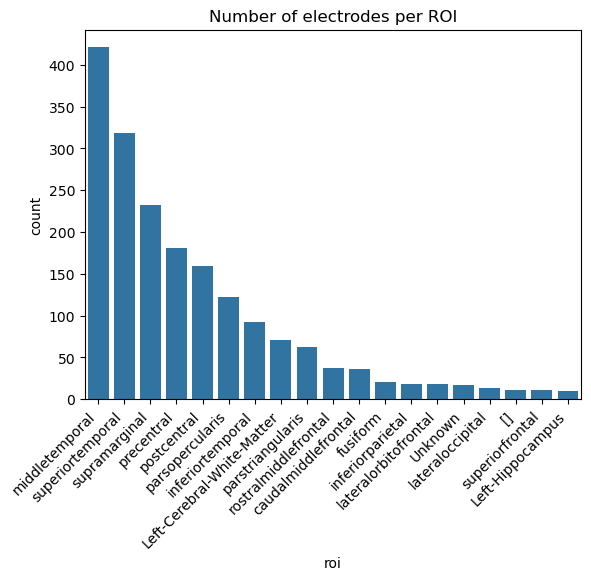

In [136]:
plot_df = all_electrodes_df.roi.value_counts()
plot_df = plot_df[plot_df >= 10]
ax = sns.barplot(data=plot_df)
ax.set_title("Number of electrodes per ROI")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
None

Text(0.5, 1.0, 'Mean improvement across subject, electrode within ROI and model')

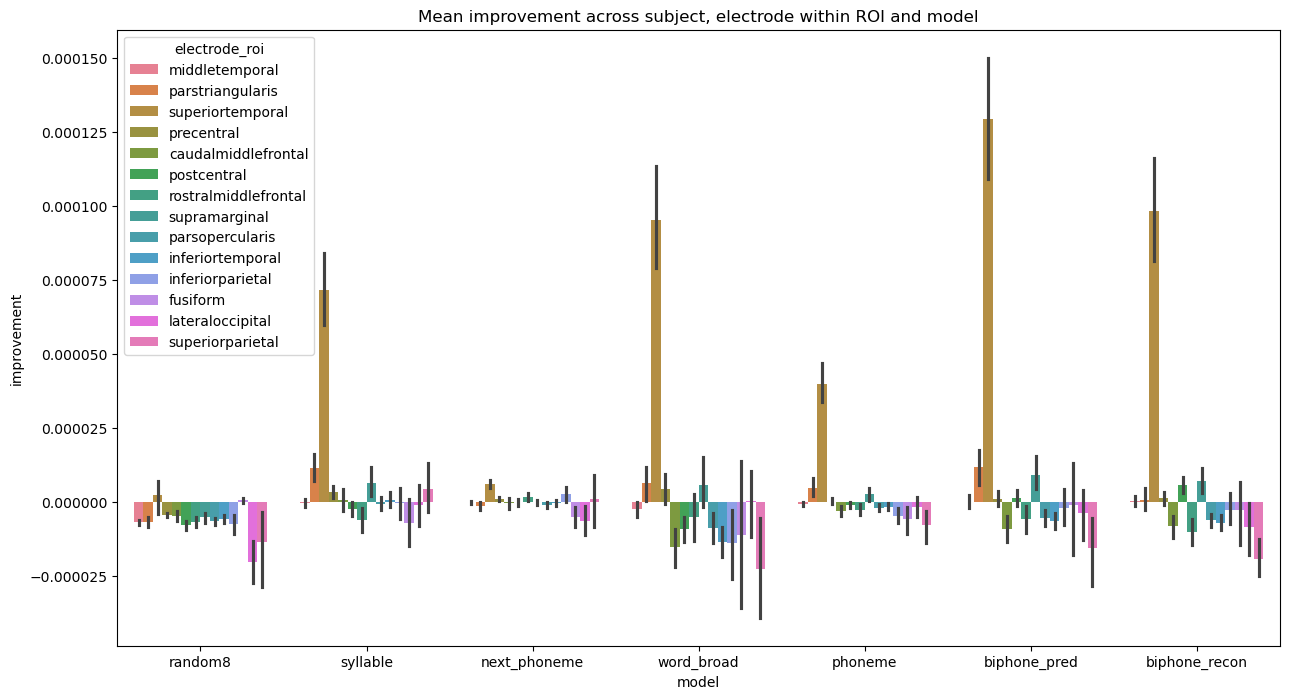

In [104]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=improvement_df.reset_index(),
            x="model", y="improvement", hue="electrode_roi", ax=ax)
ax.set_title("Mean improvement across subject, electrode within ROI and model")

/tmp/ipykernel_1566324/4142113940.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Mean improvement across subject, electrode within ROI and model')

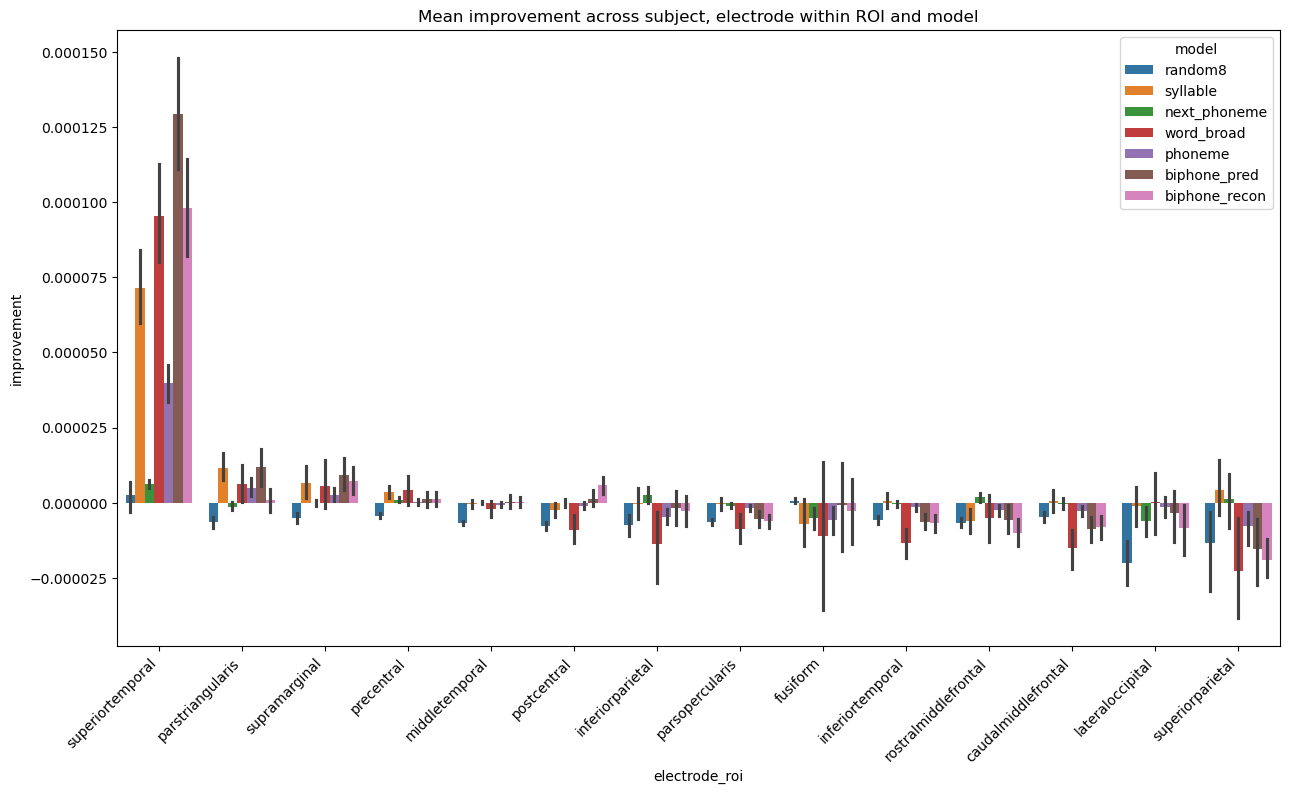

In [105]:
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=improvement_df.reset_index(),
            order=improvement_df.reset_index().groupby("electrode_roi").improvement.mean().sort_values(ascending=False).index,
            x="electrode_roi", y="improvement", hue="model",
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Mean improvement across subject, electrode within ROI and model")

/tmp/ipykernel_1566324/498425524.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Max improvement across subject, electrode within ROI and model')

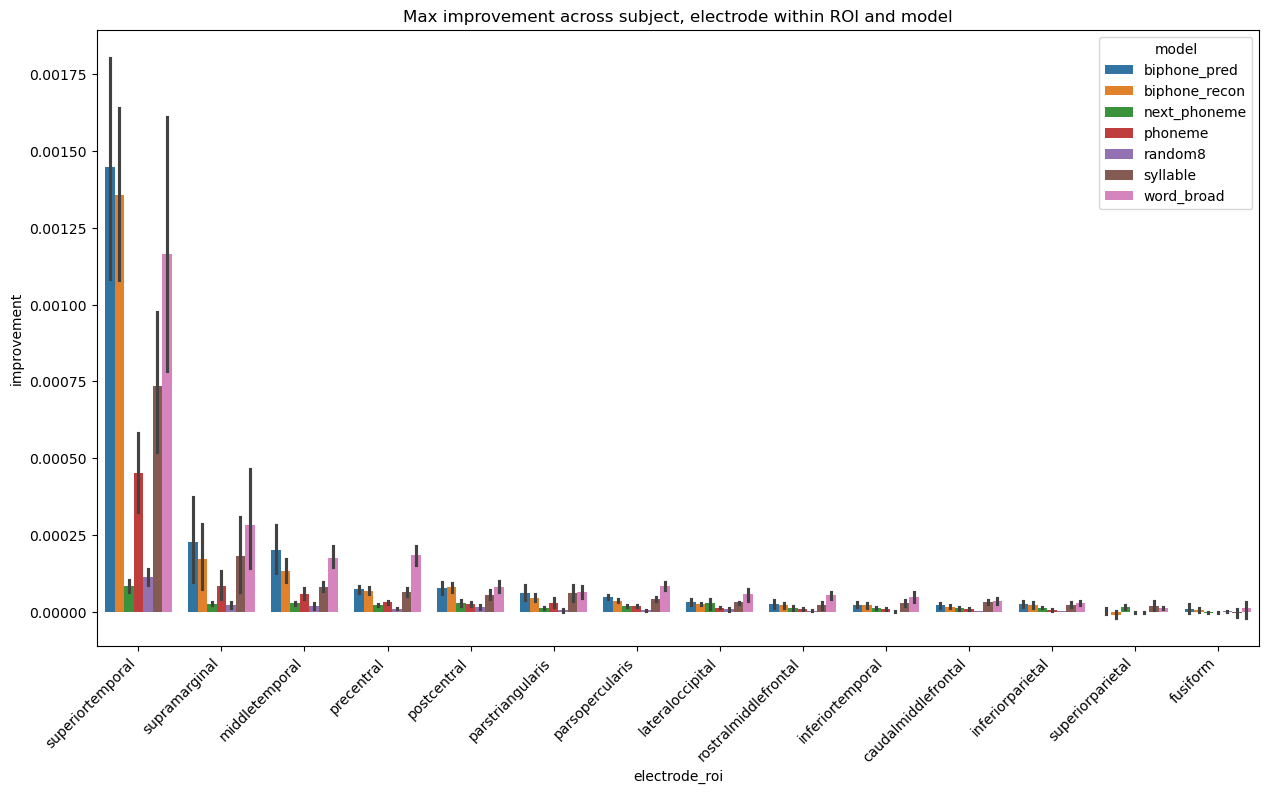

In [119]:
f, ax = plt.subplots(figsize=(15, 8))
plot_df = improvement_df.groupby(["subject", "electrode_roi", "model", "fold"]).improvement.max().reset_index()
sns.barplot(data=plot_df,
            order=plot_df.groupby("electrode_roi").improvement.mean().sort_values(ascending=False).index,
            x="electrode_roi", y="improvement", hue="model",
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Max improvement across subject, electrode within ROI and model")

In [120]:
# f, ax = plt.subplots(figsize=(15, 8))
(improvement_df.groupby(["model", "electrode_roi"]).improvement.mean() > 0).groupby("electrode_roi").any()
# sns.barplot(data=improvement_df.reset_index(),
#             x="model", y="improvement", hue="electrode_roi", ax=ax)

electrode_roi
caudalmiddlefrontal      True
fusiform                 True
inferiorparietal         True
inferiortemporal         True
lateraloccipital         True
middletemporal           True
parsopercularis         False
parstriangularis         True
postcentral              True
precentral               True
rostralmiddlefrontal     True
superiorparietal         True
superiortemporal         True
supramarginal            True
Name: improvement, dtype: bool

In [121]:
# f, ax = plt.subplots(figsize=(15, 8))
(improvement_df.groupby(["model", "electrode_roi"]).improvement.mean() > 0).groupby("model").any()
# sns.barplot(data=improvement_df.reset_index(),
#             x="model", y="improvement", hue="electrode_roi", ax=ax)

model
biphone_pred     True
biphone_recon    True
next_phoneme     True
phoneme          True
random8          True
syllable         True
word_broad       True
Name: improvement, dtype: bool